<a href="https://colab.research.google.com/github/Samarth-991/Pose-Estimation/blob/main/03_MediaPipe_Objectron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectron
MediaPipe Objectron is a mobile real-time 3D object detection solution for everyday objects. It detects objects in 2D images, and estimates their poses through a machine learning (ML) model, trained on the Objectron dataset.

In [1]:
from google.colab import files
import cv2
import matplotlib
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

# ! pip install mediapipe
import mediapipe as mp
mp_objectron = mp.solutions.objectron
mp_drawing = mp.solutions.drawing_utils

## 2D to 3D Object Prediction
While 2D prediction only provides 2D bounding boxes, by extending prediction to 3D, one can capture an object’s size, position and orientation in the world, leading to a variety of applications in robotics, self-driving vehicles, image retrieval, and augmented reality. Although 2D object detection is relatively mature and has been widely used in the industry, 3D object detection from 2D imagery is a challenging problem, due to the lack of data and diversity of appearances and shapes of objects within a category.

![Picture](https://google.github.io/mediapipe/images/objectron_example_results.png)

In [2]:
# Read images with OpenCV.
chair_img = cv2.imread('/content/chair_image.jpg')
chair_img = cv2.cvtColor(chair_img,cv2.COLOR_BGR2RGB)

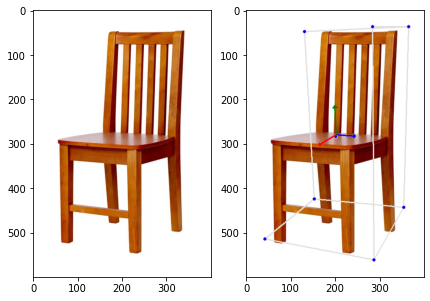

In [3]:
with mp_objectron.Objectron(static_image_mode=True,max_num_objects=5,min_detection_confidence=0.5,model_name='Chair') as objectron:
    results = objectron.process(cv2.cvtColor(chair_img, cv2.COLOR_BGR2RGB))
    # Draw box landmarks.
    if not results.detected_objects:
      print('No box landmarks detected on')
    annotated_image = chair_img.copy()
    for detected_object in results.detected_objects:
        mp_drawing.draw_landmarks(
          annotated_image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
        mp_drawing.draw_axis(annotated_image, detected_object.rotation, detected_object.translation)
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
plt.imshow(chair_img)

plt.subplot(1,2,2)
plt.imshow(annotated_image)

## Multi Object Detection

In [4]:
chair_img = cv2.imread('/content/chair2.png')
chair_img = cv2.cvtColor(chair_img,cv2.COLOR_BGR2RGB)
print(chair_img.shape)

(480, 640, 3)


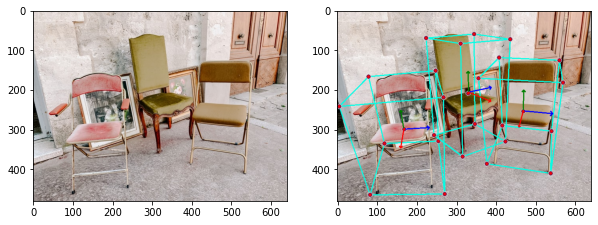

In [20]:
overlay = True
with mp_objectron.Objectron(static_image_mode=True,max_num_objects=5,min_detection_confidence=0.5,model_name='Chair') as objectron:
    results = objectron.process(cv2.cvtColor(chair_img, cv2.COLOR_BGR2RGB))
    # Draw box landmarks.
    if not results.detected_objects:
      print('No box landmarks detected on')
    annotated_image = chair_img.copy()
    for detected_object in results.detected_objects:
        mp_drawing.draw_landmarks(annotated_image, detected_object.landmarks_2d, 
                                  mp_objectron.BOX_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(0,255,230), thickness=2, circle_radius=2)
                                  )
        mp_drawing.draw_axis(annotated_image, detected_object.rotation, 
                             detected_object.translation)
        if overlay:
            for id, lm in enumerate(detected_object.landmarks_2d.landmark): 
                cx ,cy = int(lm.x*annotated_image.shape[1]),int(lm.y*annotated_image.shape[0])
                annotated_image = cv2.circle(annotated_image, (cx, cy), 3, (255,0,0), cv2.FILLED)


plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(chair_img)

plt.subplot(1,2,2)
plt.imshow(annotated_image)

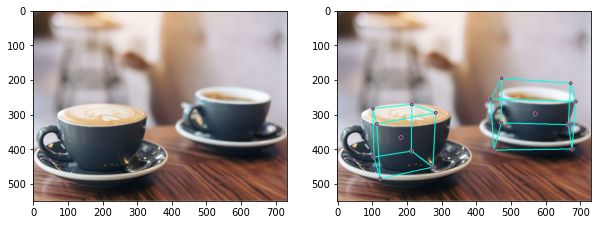

In [23]:
cup_img = cv2.cvtColor(cv2.imread('/content/cup.jpg'),cv2.COLOR_BGR2RGB)
overlay = False
with mp_objectron.Objectron(static_image_mode=True,max_num_objects=5,min_detection_confidence=0.5,model_name='Cup') as objectron:
    results = objectron.process(cup_img)
    # Draw box landmarks.
    if not results.detected_objects:
      print('No box landmarks detected on')
    annotated_image = cup_img.copy()
    for detected_object in results.detected_objects:
        mp_drawing.draw_landmarks(annotated_image, detected_object.landmarks_2d, 
                                  mp_objectron.BOX_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(0,255,230), thickness=2, circle_radius=2)
                                  )
        if overlay:
            for id, lm in enumerate(detected_object.landmarks_2d.landmark): 
                cx ,cy = int(lm.x*annotated_image.shape[1]),int(lm.y*annotated_image.shape[0])
                annotated_image = cv2.circle(annotated_image, (cx, cy), 3, (255,0,0), cv2.FILLED)


plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(cup_img)

plt.subplot(1,2,2)
plt.imshow(annotated_image)